Nombre: Rafael J. Mateo C.
Matrícula: A01793054

Comenzamos importando los datos y las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Se importan los datos
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


##### **Regresión Lineal Simple**

La regresión lineal es un método para entender la relación entre dos variables:

* La variable independiente (X)
* La variable dependiente o de respuesta (Y)

In [3]:
from sklearn.linear_model import LinearRegression

#Se crea el modelo
lm = LinearRegression()
lm

LinearRegression()

In [4]:

#Se definen las Xs y las Ys
X = df[['highway-mpg']]
Y = df['price']


In [5]:
#Se entrena el modelo
lm.fit(X,Y)


LinearRegression()

In [6]:
#Se obtienen las predicciones
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [7]:
#El intercepto
lm.intercept_

38423.3058581574

In [8]:
#El coeficiente
lm.coef_

array([-821.73337832])

#### **Regresión Lineal Múltiple**

Si queremos predecir más de una variable, entonces utilizamos la regresión lineal múltiple. Este método es similar al visto arriba, pero explica la relación entre una variable dependiente y dos o más variables independientes.

In [9]:
#Definimos las variables a predecir
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [10]:
#Entrenamos el modelo
lm.fit(Z, df['price'])

LinearRegression()

In [11]:
#Obtenemos el intercepto
lm.intercept_

-15806.624626329227

In [12]:
#Obtenemos los coeficientes
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

#### **Evaluación del Modelo**

**Gráfico de Regresión**

Este gráfico permite visualizar que tan bien se ajusta el modelo a los datos.

In [13]:
import seaborn as sns

(0.0, 48181.65349577312)

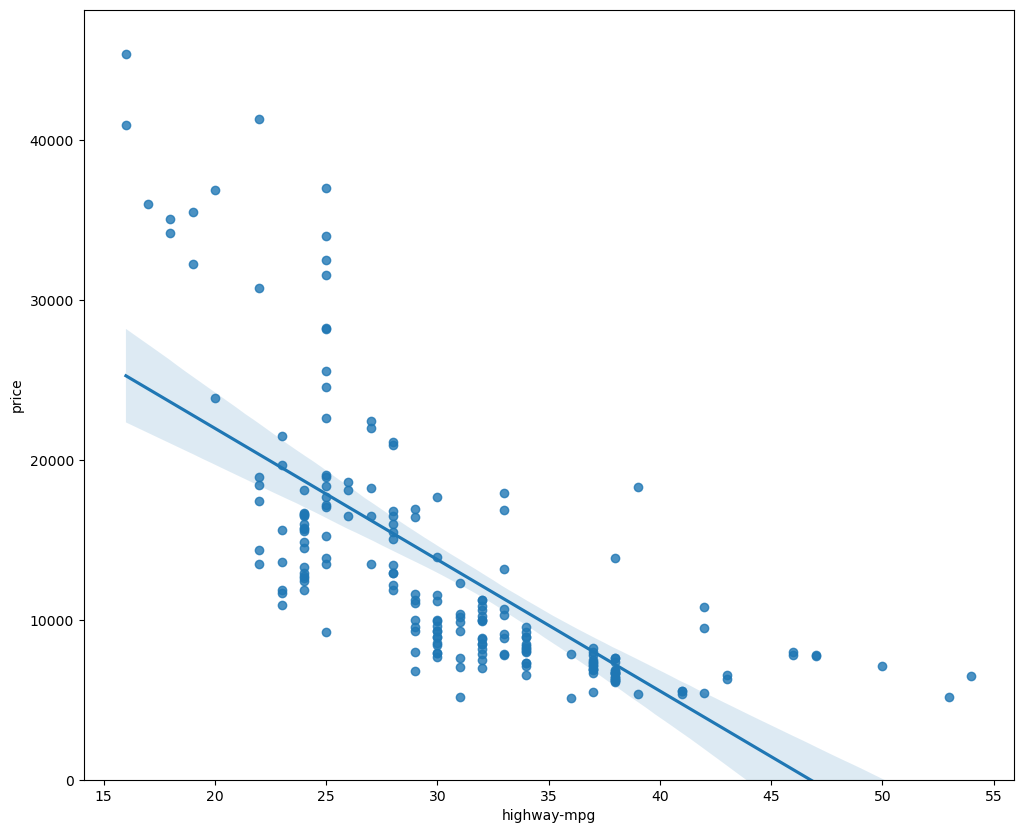

In [14]:
#Se define el gráfico

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

Del gráfico anterior se observa correlación negativa

(0.0, 47414.1)

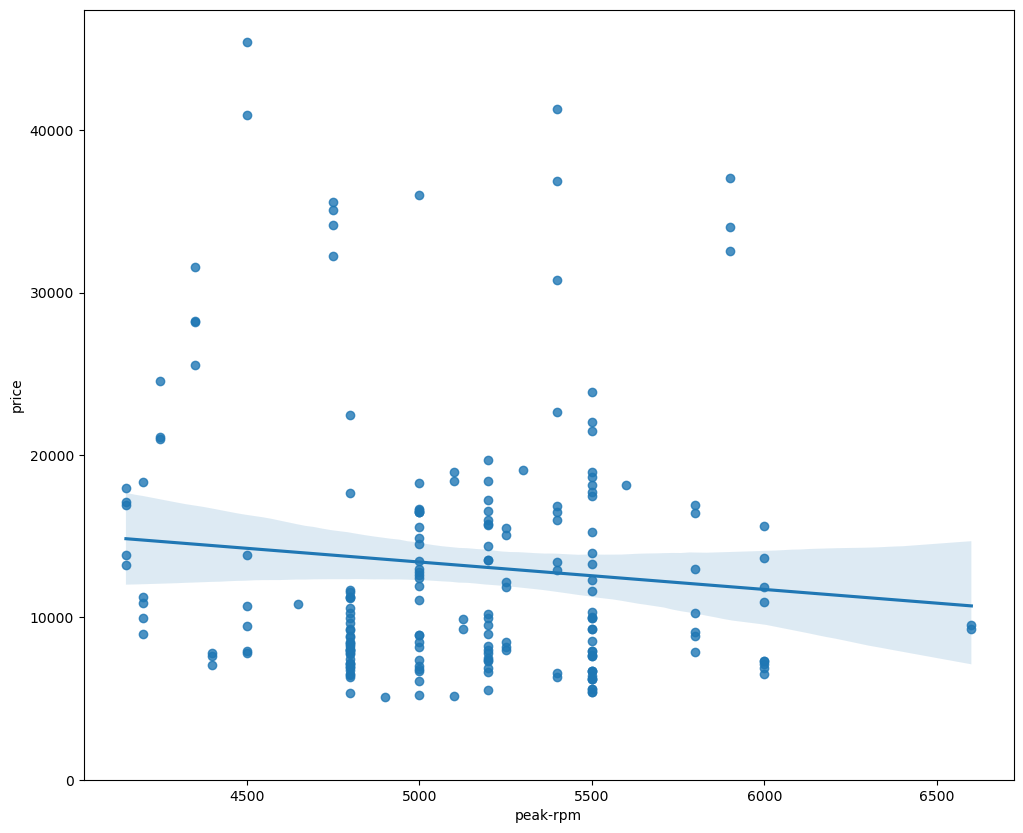

In [15]:
#Definición del gráfico
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Se observa una ligera correlación negativa.

**Gráfico de Residuos**

Con este gráfico podemos ver si los residuos tienen alguna relación (una de las suposiciones es que los residuos sean independientes)

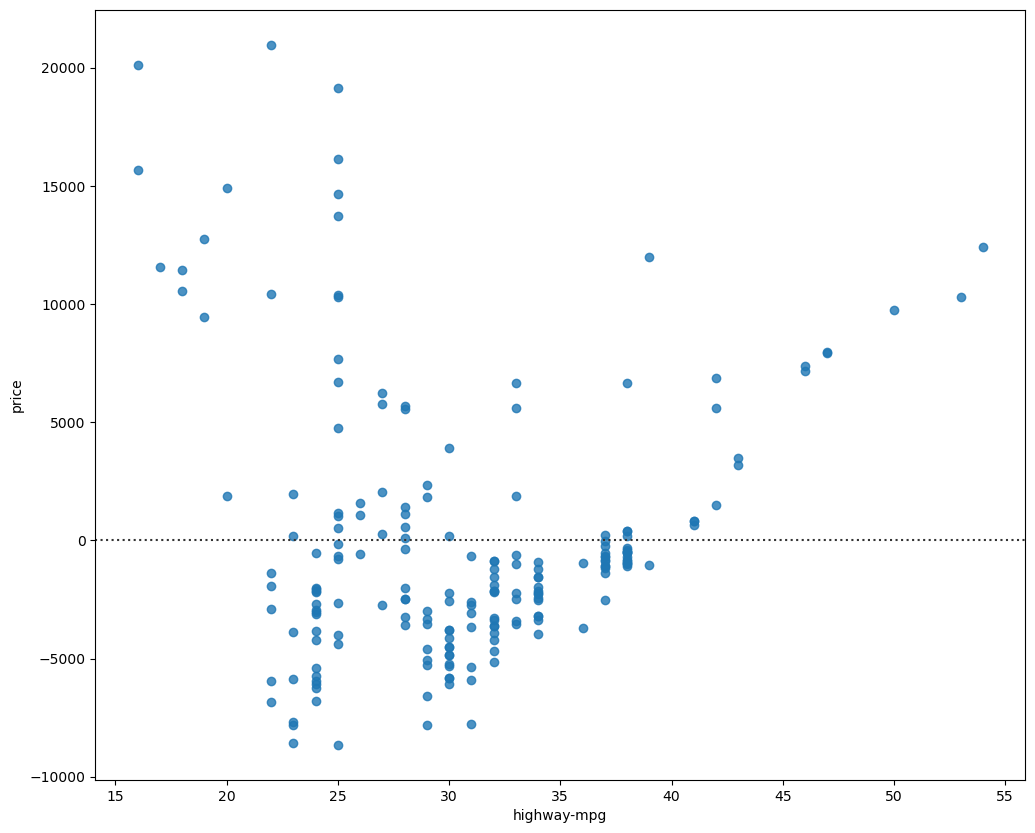

In [16]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

Los residuos no están dispersos de manera aleatoria. Se observa un patrón curvo, por lo que podría existir una relaicón no lineal.

**Regresión Lineal Múltiple**

La única forma que tenemos de visualizar este tipo de modelo es mirando su gráfico de distribución.

In [17]:
#Obtenemos las predicciones
Y_hat = lm.predict(Z)

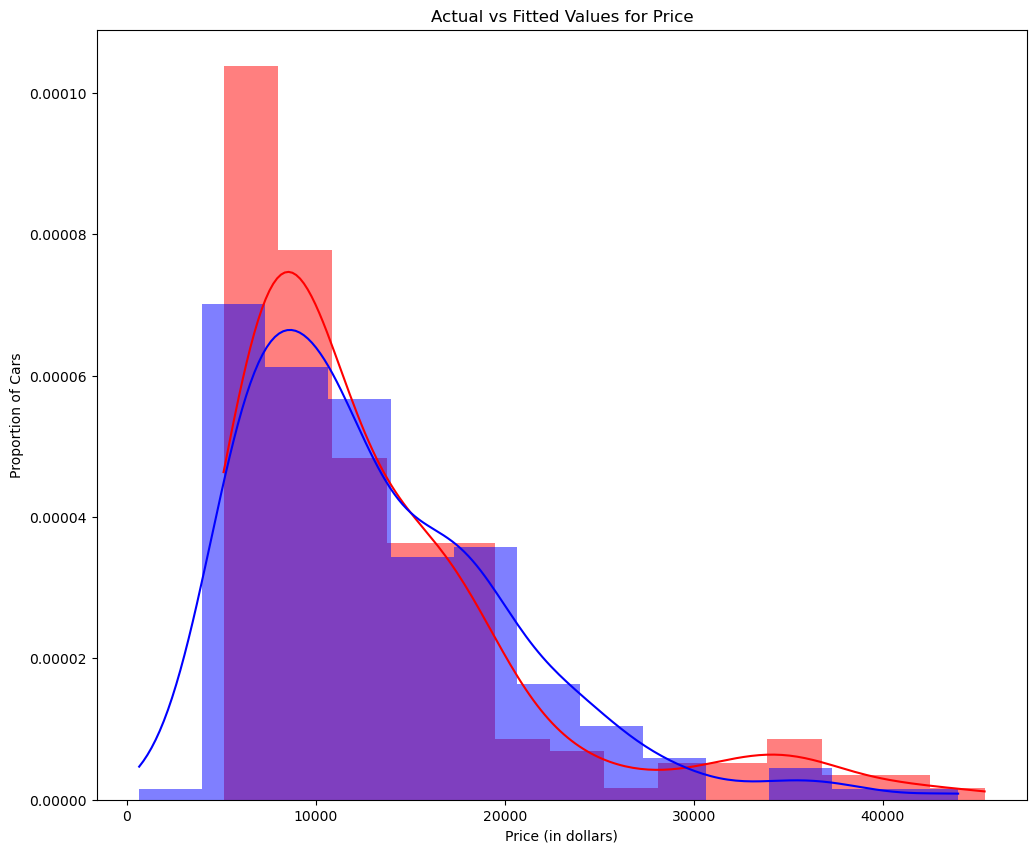

In [20]:

#Realizamos el gráfico
plt.figure(figsize=(width, height))


ax1 = sns.histplot(df['price'], kde=True, stat="density", linewidth=0, color="r", label="Actual Value")
sns.histplot(Y_hat, kde=True, stat="density", linewidth=0, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

Ambas distribuciones se superponen, por lo que obtienen valores muy parecidos.

**Regresión Polinómica**

Es un caso particular de la regresión lineal, donde obtenemos relaciones no lineales con términos de orden mayor.

In [21]:
#Función para plotear el modelo
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca() #Se obtiene el axis actual
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf() #Se obtiene la figura actual
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [22]:
#definimos x y y
x = df['highway-mpg']
y = df['price']

In [23]:
#Usamos un polinomio de orden 3
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Realizamos el gráfico

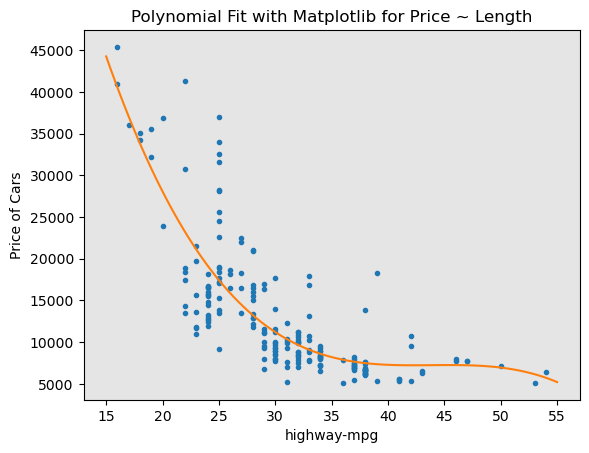

In [24]:
PlotPolly(p, x, y, 'highway-mpg')

Se observa que esta varibale se desempeña mejor con una función polinómica, que con un modelo lineal

In [25]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Si se requiere predecir múltiples features para una función polinómica, entonces hay que usar una librería, como veremos a continuación.

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [27]:
#Polinomio de orden 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [28]:
Z_pr=pr.fit_transform(Z)

In [29]:
#Datos originales
Z.shape

(201, 4)

In [30]:
#Datos transformados
Z_pr.shape

(201, 15)

**Pipelines**

Por medio de los pipelines se simplifican los pasos para procesar los datos

In [31]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [32]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [33]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [34]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

#### **Medidas de Evaluación**

Podemos usar ciertas medidas para evaluar el desempeño de nuestro modelo. A continuación un ejemplo para la regresión lineal simple

In [35]:
#Entrenamos el modelo
lm.fit(X, Y)
# Se encuentra el coeficiente de determinación
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [36]:
#Predecimos las y e imprimimos las primera 4
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [37]:
from sklearn.metrics import mean_squared_error

Buscamos el error cuadrático medio

In [38]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


#### **Evidencias Graded Review Questions**

![alt text](graded-review-questions.png "Title")
